
# Project 3: Predict attendance at a medical appointment based on different variables.
<b>Rodrigo Contreras Vielma - contrerasvielma@gmail.com</b><br>
Source of data (Kaggle): <A HREF='https://www.google.com/url?q=https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv&sa=D&ust=1532469042118000'>Get Data</A>


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


The goal of this project is determinate and know if are there factors to predict if a patient will
show up for their scheduled appointment?


The dataset used to this project collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. The following characteristics about the patient are included in each row.
     
<ul>
    <li>‘PatientId’ is the ID of patient that request a medical appointment.</li>
    <li>‘AppointmentID’ is the ID of Appointment used by the system or application of medical center.</li>
    <li>‘Gender’ of the patient.</li>
    <li>‘ScheduledDay’ tells us on what day the patient set up their appointment.</li>
    <li>‘Age’ of the patient.</li>
    <li>‘Neighborhood’ indicates the location of the hospital.</li>
    <li>‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
    </li>
    <li>‘Hipertension, Diabetes, Alcoholism, Handcap’ are atributes inherits to a each patient.</li>
    <li>‘SMS_received’ is a message sent to each patient about an appointment.</li>
    <li>Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.</li>
</ul>


In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dayOfWeek={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Read the CSV file using pandas

data = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

data.head()
#We can appreciate a print preview of data.


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No



### Data Cleaning

In [3]:
data.duplicated().sum()

0

It's important to know that we don't have duplicated records.

In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


We can appreciate datatypes, non null values and records quantity. In my opinion is better change the following atributes to datetime format.

In [5]:
data['PatientId']      = data['PatientId'].astype('int64')  #Avoid scientific notations
data['ScheduledDay']   = pd.to_datetime(data['ScheduledDay'])
data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay'])


We change datatypes from object to datetime

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  int64              
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

In [7]:
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


We can appreciate the dataframe has fourteen columns and over one houndred and ten thousand records.
In my opinion the columns PatientId and AppointmentID are not relevant to our analysis.
Before drop off both columns we are goint to test a few considerations (Duplicated records, nulls).

In [8]:
data['DateDiff'] = data['AppointmentDay'] - data['ScheduledDay'] 
data['Anticipated_hours'] = data['DateDiff'].astype('timedelta64[h]')
data['Anticipated_days'] = round(data['Anticipated_hours'] / 24, 0).astype(int) + 1

We are adding two new columns to see how far in advance the appointment was scheduled.

In [9]:
data.head(100)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,DateDiff,Anticipated_hours,Anticipated_days
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,-1 days +05:21:52,-19.0,0
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,-1 days +07:51:33,-17.0,0
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,-1 days +07:40:56,-17.0,0
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,-1 days +06:30:29,-18.0,0
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,-1 days +07:52:37,-17.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,198624862183842,5640307,M,2016-04-29 10:28:54+00:00,2016-04-29 00:00:00+00:00,1,BONFIM,0,0,0,0,0,0,No,-1 days +13:31:06,-11.0,1
96,79376248773989,5623692,M,2016-04-26 14:28:39+00:00,2016-04-29 00:00:00+00:00,3,BONFIM,0,0,0,0,0,1,No,2 days 09:31:21,57.0,3
97,5253342488842,5565493,F,2016-04-11 09:00:00+00:00,2016-04-29 00:00:00+00:00,35,BONFIM,0,0,0,0,0,1,No,17 days 15:00:00,423.0,19
98,372596436556933,5571906,F,2016-04-12 09:44:42+00:00,2016-04-29 00:00:00+00:00,51,BONFIM,0,0,0,0,0,1,No,16 days 14:15:18,398.0,18


In [10]:
print('Shape=', str(data.shape));

Qty_Records = data.shape[0]

print('Quantity of records=', Qty_Records);


Shape= (110527, 17)
Quantity of records= 110527


In [11]:
data.isnull().sum()

PatientId            0
AppointmentID        0
Gender               0
ScheduledDay         0
AppointmentDay       0
Age                  0
Neighbourhood        0
Scholarship          0
Hipertension         0
Diabetes             0
Alcoholism           0
Handcap              0
SMS_received         0
No-show              0
DateDiff             0
Anticipated_hours    0
Anticipated_days     0
dtype: int64

It's important to know that we don't have a null values

In [12]:
data['AppointmentID'].duplicated().sum()

0

It's important to know that we don't have a duplicated records that we affect our analysis.

In [13]:
data['AppointmentID'].describe()

count    1.105270e+05
mean     5.675305e+06
std      7.129575e+04
min      5.030230e+06
25%      5.640286e+06
50%      5.680573e+06
75%      5.725524e+06
max      5.790484e+06
Name: AppointmentID, dtype: float64

In [14]:
Min_AppointmentID = data['AppointmentID'].min()
Max_AppointmentID = data['AppointmentID'].max()

Qty_AppointmentID = Max_AppointmentID - Min_AppointmentID 

print('Min AppID= {0}, Max AppID= {1}, Qty AppID= {2}'.format(Min_AppointmentID, Max_AppointmentID, Qty_AppointmentID ))

Min AppID= 5030230, Max AppID= 5790484, Qty AppID= 760254


In terms of database records of capture the system, between the min and max Appointmend ID, we got 760254 records. It's a important things because our dataframe only have 110527 records.

In [15]:
Diff_Records = Qty_AppointmentID - Qty_Records
print('Diff_records= {0}'.format(Diff_Records))

Data_gathered = Qty_Records / Qty_AppointmentID 
print('% of data gathered= {0}%'.format( round(Data_gathered * 100, 2) ))



Diff_records= 649727
% of data gathered= 14.54%


We only got a 14.54% of total amount of record of appointments. Probably they had a issue with the capture of data.


In [16]:
data.drop(['AppointmentID'], axis=1, inplace=True)


The AppointmentID is not relevant to our Analysis.

In [17]:
data.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,DateDiff,Anticipated_hours,Anticipated_days
0,29872499824296,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,-1 days +05:21:52,-19.0,0
1,558997776694438,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,-1 days +07:51:33,-17.0,0
2,4262962299951,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,-1 days +07:40:56,-17.0,0
3,867951213174,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,-1 days +06:30:29,-18.0,0
4,8841186448183,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,-1 days +07:52:37,-17.0,0


In [18]:
print(data.shape)

(110527, 16)


In [19]:
data.describe()

,PatientId,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,DateDiff,Anticipated_hours,Anticipated_days
count,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527,110527.000000,110527.000000
mean,1.474963e+14,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,9 days 17:08:34.161960424,232.634596,10.779755
std,2.560949e+14,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,15 days 05:51:27.891504122,365.862775,15.229088
min,3.921700e+04,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7 days +10:10:40,-158.000000,-6.000000
25%,4.172614e+12,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1 days +15:41:31.500000,-9.000000,1.000000
50%,3.173184e+13,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3 days 11:22:18,83.000000,4.000000
75%,9.439172e+13,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,14 days 07:41:34.500000,343.000000,15.000000
max,9.999816e+14,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,178 days 13:19:01,4285.000000,180.000000


In [20]:
data['PatientId'].value_counts()


822145925426128    88
99637671331        84
26886125921145     70
33534783483176     65
6264198675331      62
                   ..
2886912523138       1
68129842443312      1
99264711372         1
2212945531847       1
57863365759569      1
Name: PatientId, Length: 62299, dtype: int64

Indentify how many time one patient request a appointment

In [21]:
data['Gender'].value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

In [22]:
data.Gender.nunique()

2

The variable 'Gender' (F = Female, M = Male) is fine because you only have two correct choices. We don't need to do anything.
It can be seen that there are more requirements for women than for men.

<AxesSubplot:title={'center':'Histogram by Gender'}, xlabel='Gender', ylabel='Quantity of records'>

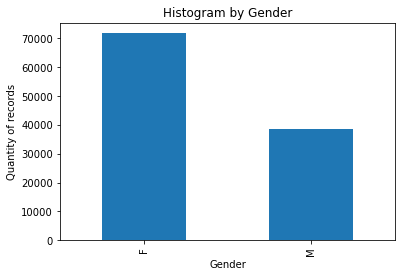

In [23]:
#data.Gender.hist();

data.groupby('Gender').size().plot(kind='bar', title='Histogram by Gender', xlabel='Gender', ylabel='Quantity of records' )

Basic way to make a histogram. It's easy to appreciate there are more female than male appointment.

In [24]:
data.query('Gender == "F"')['Gender'].size

71840

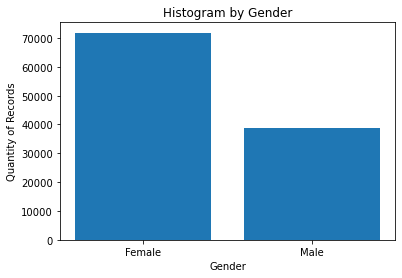

In [25]:
# Histogram by Gender
locations = [1, 2]

Female_Qty = data.query('Gender == "F"')['Gender'].size;
Male_Qty   = data.query('Gender == "M"')['Gender'].size;

heights = [Female_Qty, Male_Qty]
labels = ['Female', 'Male']
plt.bar(locations, heights, tick_label=labels)
plt.title('Histogram by Gender')
plt.xlabel('Gender')
plt.ylabel('Quantity of Records');



Other way to plot.

In [26]:

data['Weekday_ScheduledDay'] = data['ScheduledDay'].dt.dayofweek.map(dayOfWeek)


In [27]:
data.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,DateDiff,Anticipated_hours,Anticipated_days,Weekday_ScheduledDay
0,29872499824296,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,-1 days +05:21:52,-19.0,0,Friday
1,558997776694438,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,-1 days +07:51:33,-17.0,0,Friday
2,4262962299951,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,-1 days +07:40:56,-17.0,0,Friday
3,867951213174,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,-1 days +06:30:29,-18.0,0,Friday
4,8841186448183,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,-1 days +07:52:37,-17.0,0,Friday


In [28]:
data.ScheduledDay.min()


Timestamp('2015-11-10 07:13:56+0000', tz='UTC')

In [29]:
data.ScheduledDay.max()


Timestamp('2016-06-08 20:07:23+0000', tz='UTC')

The time window available with the dataset covers about 7 months. It would be ideal to have much more information, hopefully at least twelve months to have a better understanding of the model considering the seasonal effects.

In [30]:
data['Weekday_ScheduledDay'].value_counts()

Tuesday      26168
Wednesday    24262
Monday       23085
Friday       18915
Thursday     18073
Saturday        24
Name: Weekday_ScheduledDay, dtype: int64

<AxesSubplot:title={'center':'Histogram by Week Day Scheduled'}, xlabel='Weekday', ylabel='Quantity of records'>

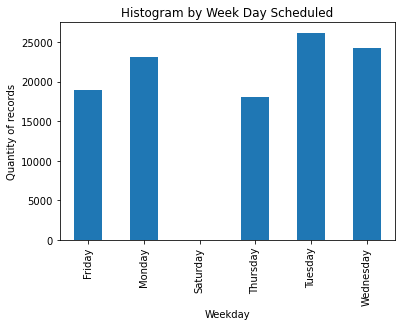

In [31]:
data.groupby('Weekday_ScheduledDay').size().plot(kind='bar', title='Histogram by Week Day Scheduled', xlabel='Weekday', ylabel='Quantity of records')

Scheduled Day with more Appointments

In [32]:
data['Weekday_AppointmentDay'] = data['AppointmentDay'].dt.dayofweek.map(dayOfWeek)

In [33]:
data['Weekday_AppointmentDay'].value_counts()

Wednesday    25867
Tuesday      25640
Monday       22715
Friday       19019
Thursday     17247
Saturday        39
Name: Weekday_AppointmentDay, dtype: int64

<AxesSubplot:title={'center':'Histogram by Weekday Appointment Day'}, xlabel='Weekday', ylabel='Quantity of records'>

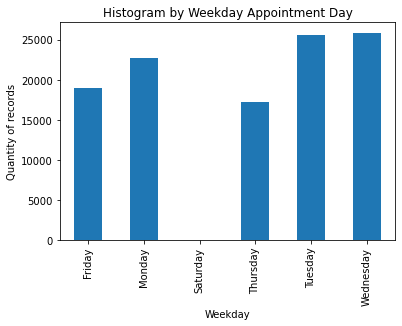

In [34]:
data.groupby('Weekday_AppointmentDay').size().plot(kind='bar', title='Histogram by Weekday Appointment Day',
                                                   xlabel='Weekday', ylabel='Quantity of records')


Appointment days more requested.

In [35]:
data['Age'].value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

In [36]:
data['Age'].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

in the Age variable we will assume that:<br>
<ul>
    <li>-1: refers to pregnant woman</li>
    <li> 0: refers to a baby who is not yet one year old</li>
    <li> 1: refers to a one year old baby</li>
    <li> 2 onwards, the patient's age</li>
</ul>

In [37]:
pregnant = data.query('Age == -1')
pregnant['Gender'].value_counts()

F    1
Name: Gender, dtype: int64

Other way to ask the same: pregnant = data.query('Age == -1')
pregnant['Gender'].value_counts()
<br><br>
It is ok that the Gender of pregnant women was female.

<AxesSubplot:>

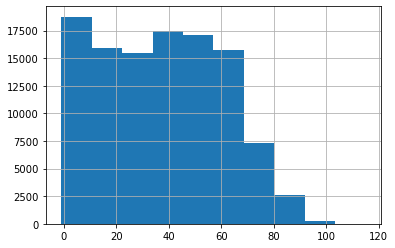

In [38]:
data.Age.hist()

In [39]:
data.query('Age > 100')

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,DateDiff,Anticipated_hours,Anticipated_days,Weekday_ScheduledDay,Weekday_AppointmentDay
58014,976294799775439,F,2016-05-03 09:14:53+00:00,2016-05-03 00:00:00+00:00,102,CONQUISTA,0,0,0,0,0,0,No,-1 days +14:45:07,-10.0,1,Tuesday,Tuesday
63912,31963211613981,F,2016-05-16 09:17:44+00:00,2016-05-19 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,Yes,2 days 14:42:16,62.0,4,Monday,Thursday
63915,31963211613981,F,2016-05-16 09:17:44+00:00,2016-05-19 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,Yes,2 days 14:42:16,62.0,4,Monday,Thursday
68127,31963211613981,F,2016-04-08 14:29:17+00:00,2016-05-16 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,Yes,37 days 09:30:43,897.0,38,Friday,Monday
76284,31963211613981,F,2016-05-30 09:44:51+00:00,2016-05-30 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,No,-1 days +14:15:09,-10.0,1,Monday,Monday
90372,234283596548,F,2016-05-31 10:19:49+00:00,2016-06-02 00:00:00+00:00,102,MARIA ORTIZ,0,0,0,0,0,0,No,1 days 13:40:11,37.0,3,Tuesday,Thursday
97666,748234579244724,F,2016-05-19 07:57:56+00:00,2016-06-03 00:00:00+00:00,115,SÃO JOSÉ,0,1,0,0,0,1,No,14 days 16:02:04,352.0,16,Thursday,Friday


It is strange to have records over 100 years old, but the following link indicates that it is possible

https://www.guinnessworldrecords.com/world-records/oldest-person#:~:text=Share&text=The%20greatest%20fully%20authenticated%20age,France%20on%204%20August%201997.

In [40]:
# Bin edges that will be used to "cut" the data into groups
bin_edges = [-1, 18, 37, 55, 115] 


In [41]:

# Labels for quantity anticipated groups
bin_names = ['<18', '19 - 37', '38 - 55', '> 56'] # Name each Age range category

In [42]:

data['Age_groups'] = pd.cut(data['Age'], bin_edges, labels=bin_names)

We add a new column to create a category groups by Age that could help to improve our Analysis.

In [43]:
data.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,DateDiff,Anticipated_hours,Anticipated_days,Weekday_ScheduledDay,Weekday_AppointmentDay,Age_groups
0,29872499824296,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,-1 days +05:21:52,-19.0,0,Friday,Friday,> 56
1,558997776694438,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,-1 days +07:51:33,-17.0,0,Friday,Friday,> 56
2,4262962299951,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,-1 days +07:40:56,-17.0,0,Friday,Friday,> 56
3,867951213174,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,-1 days +06:30:29,-18.0,0,Friday,Friday,<18
4,8841186448183,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,-1 days +07:52:37,-17.0,0,Friday,Friday,> 56


<AxesSubplot:title={'center':'Histogram by Age groups'}, xlabel='Age groups', ylabel='Quantity of records'>

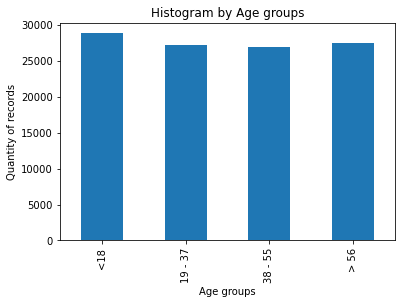

In [44]:
data.groupby('Age_groups').size().plot(kind='bar', title='Histogram by Age groups',
                                                   xlabel='Age groups', ylabel='Quantity of records')


We have a very homogeneous groups by Age

<AxesSubplot:title={'center':'Histogram by Neighbourhood'}, xlabel='Neighbourhood', ylabel='Quantity of records'>

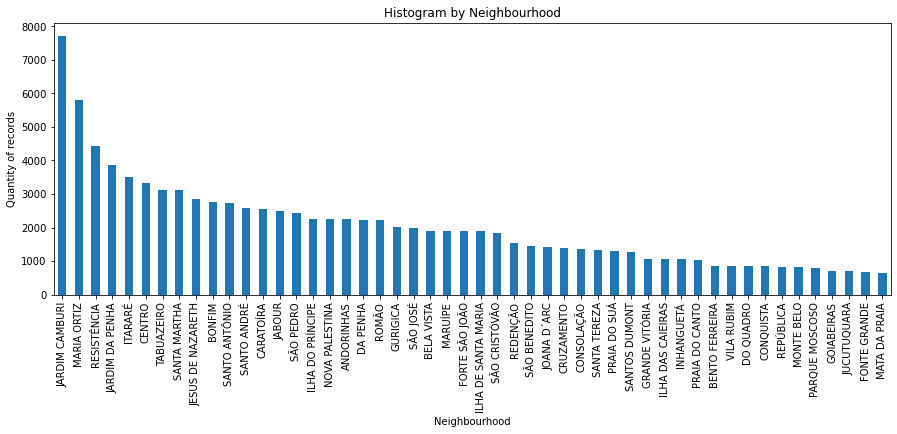

In [45]:
data.Neighbourhood.value_counts().head(50).plot(kind='bar', figsize=(15,5), title='Histogram by Neighbourhood',
                                                   xlabel='Neighbourhood', ylabel='Quantity of records')

The top 50 Neighbourhood

In [46]:
data['Scholarship'].value_counts()

0    99666
1    10861
Name: Scholarship, dtype: int64

in the Scholarship variable we will assume that:<br>
<ul>
    <li>1: The people has Scholarship.</li>
    <li>0: The people hasn't Scholarship, <b>majority case</b>.</li>
</ul>

<AxesSubplot:title={'center':'Histogram by Scholarship'}, xlabel='Scholarship', ylabel='Quantity of records'>

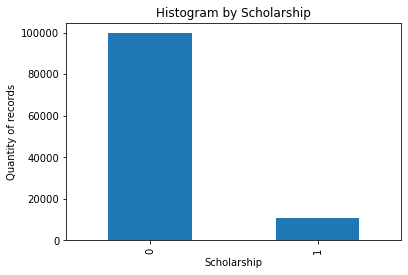

In [47]:
data.groupby('Scholarship').size().plot(kind='bar', title='Histogram by Scholarship',
                                                   xlabel='Scholarship', ylabel='Quantity of records')

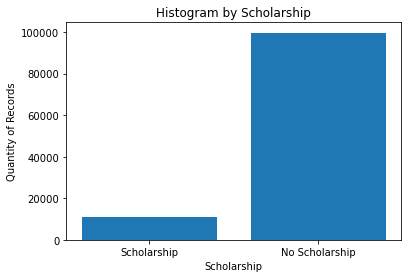

In [48]:
#data.Scholarship.hist();

# Histogram by Scholarship
locations = [1, 2]

Sch_Qty = data.query('Scholarship == "1"')['Scholarship'].size;
nSch_Qty   = data.query('Scholarship == "0"')['Scholarship'].size;

heights = [Sch_Qty, nSch_Qty]
labels = ['Scholarship', 'No Scholarship']
plt.bar(locations, heights, tick_label=labels)
plt.title('Histogram by Scholarship')
plt.xlabel('Scholarship')
plt.ylabel('Quantity of Records');

In [49]:
data['Hipertension'].value_counts()

0    88726
1    21801
Name: Hipertension, dtype: int64

in the Hipertension variable we will assume that:<br>
<ul>
    <li>1: The people has Hipertension.</li>
    <li>0: The people hasn't Hipertension, <b>majority case</b>.</li>
</ul>

<AxesSubplot:title={'center':'Histogram by Hipertension'}, xlabel='Hipertension', ylabel='Quantity of records'>

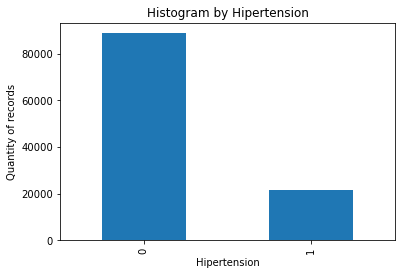

In [50]:
data.groupby('Hipertension').size().plot(kind='bar', title='Histogram by Hipertension',
                                                   xlabel='Hipertension', ylabel='Quantity of records')

In [51]:
data['Diabetes'].value_counts()

0    102584
1      7943
Name: Diabetes, dtype: int64

in the Diabetes variable we will assume that:<br>
<ul>
    <li>1: The people has Diabetes.</li>
    <li>0: The people hasn't Diabetes, <b>majority case</b>.</li>
</ul>

<AxesSubplot:title={'center':'Histogram by Diabetes'}, xlabel='Diabetes', ylabel='Quantity of records'>

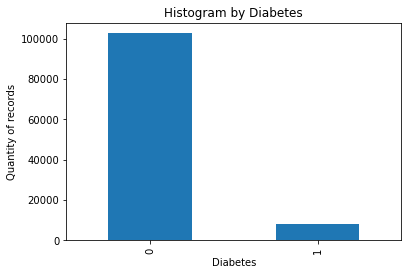

In [52]:
data.groupby('Diabetes').size().plot(kind='bar', title='Histogram by Diabetes',
                                                   xlabel='Diabetes', ylabel='Quantity of records')

In [53]:
data['Alcoholism'].value_counts()

0    107167
1      3360
Name: Alcoholism, dtype: int64

in the Alcoholism variable we will assume that:<br>
<ul>
    <li>1: The people has Alcoholism.</li>
    <li>0: The people hasn't Alcoholism, <b>majority case</b>.</li>
</ul>

<AxesSubplot:title={'center':'Histogram by Alcoholism'}, xlabel='Alcoholism', ylabel='Quantity of records'>

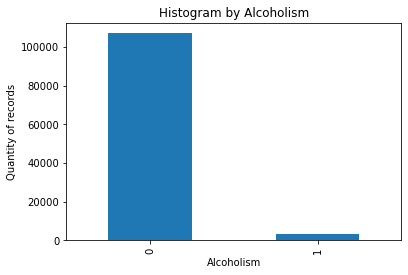

In [54]:
data.groupby('Alcoholism').size().plot(kind='bar', title='Histogram by Alcoholism',
                                                   xlabel='Alcoholism', ylabel='Quantity of records')


In [55]:
data['Handcap'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

in the Handcap variable we will assume that:<br>
<ul>
    <li>1: The people has any kind of Handcap</li>
    <li>0: The people hasn't any kind of Handcap, <b>majority case</b>.</li>
</ul>

<AxesSubplot:title={'center':'Histogram by Handcap'}, xlabel='Handcap', ylabel='Quantity of records'>

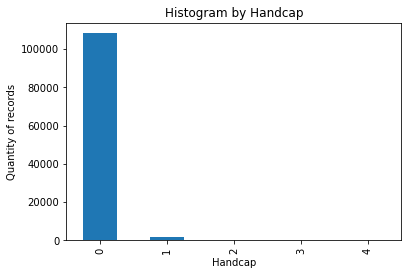

In [56]:
data.groupby('Handcap').size().plot(kind='bar', title='Histogram by Handcap',
                                                xlabel='Handcap', ylabel='Quantity of records')


In [57]:
data['SMS_received'].value_counts()

0    75045
1    35482
Name: SMS_received, dtype: int64

in the SMS_received variable we will assume that:<br>
<ul>
    <li>1: The people did receive a SMS.</li>
    <li>0: The people didn't, receive a SMS, <b>majority case</b>.</li>
</ul>

In [58]:
data['SMS_received'].value_counts()/Qty_Records*100

0    67.897437
1    32.102563
Name: SMS_received, dtype: float64

Only 32,1% de SMS were received.

<AxesSubplot:title={'center':'Histogram by SMS_received'}, xlabel='SMS_received', ylabel='Quantity of records'>

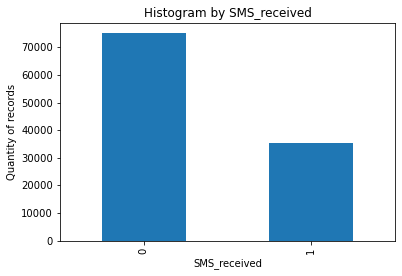

In [59]:
data.groupby('SMS_received').size().plot(kind='bar', title='Histogram by SMS_received',
                                         xlabel='SMS_received', ylabel='Quantity of records')


In [60]:
data['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

in the No-show variable we will assume that:<br>
<ul>
    <li>No: If the patient showed up to their appointment, <b>majority case</b>.</li>
    <li>Yes: If they did not show up.</li>
</ul>

In [61]:
data['No-show'].value_counts()/Qty_Records*100

No     79.806744
Yes    20.193256
Name: No-show, dtype: float64

We got a 79,80% in the effectiveness in the appointment. In my opinion is a good performance indicator.

<AxesSubplot:title={'center':'Histogram by No-show'}, xlabel='No-show', ylabel='Quantity of records'>

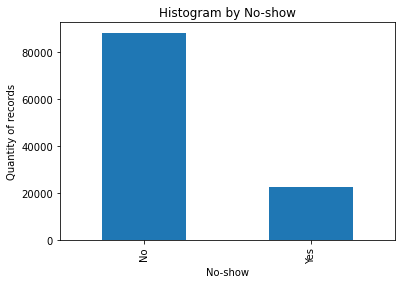

In [62]:
data.groupby('No-show').size().plot(kind='bar', title='Histogram by No-show',
                                    xlabel='No-show', ylabel='Quantity of records')


In [63]:
data.Anticipated_days.value_counts().head(50)

1     29210
0     12158
3      5774
7      4910
2      4891
5      4849
8      3397
4      3301
6      3254
15     2442
9      2176
14     2136
21     1630
29     1482
13     1473
22     1393
11     1377
28     1366
10     1315
16     1229
19     1138
17     1107
23     1077
20     1072
18     1061
35      918
27      915
12      831
30      786
31      761
34      713
36      708
24      701
33      693
26      648
25      643
32      554
37      477
42      368
43      347
41      297
63      235
38      229
40      225
39      196
44      195
51      189
49      178
57      177
67      165
Name: Anticipated_days, dtype: int64

<AxesSubplot:title={'center':'Histogram by Anticipated days'}, xlabel='Anticipated days', ylabel='Quantity of records'>

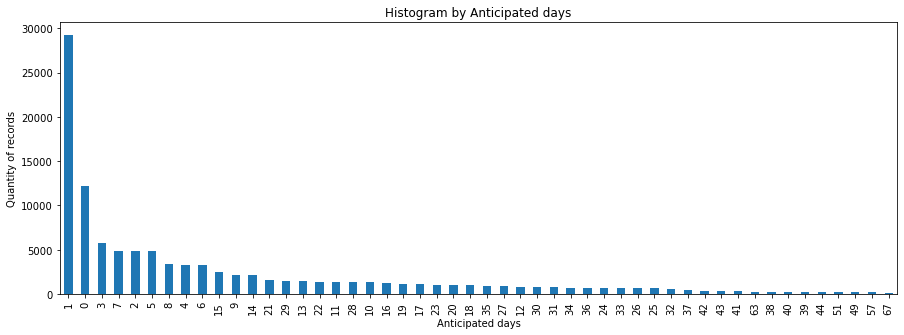

In [64]:
data.Anticipated_days.value_counts().head(50).plot(kind='bar', figsize=(15,5), title='Histogram by Anticipated days',
                                    xlabel='Anticipated days', ylabel='Quantity of records')

Top 50 requested Appointment by anticipated days

In [65]:
data.Anticipated_days.describe()

count    110527.000000
mean         10.779755
std          15.229088
min          -6.000000
25%           1.000000
50%           4.000000
75%          15.000000
max         180.000000
Name: Anticipated_days, dtype: float64

In [66]:
# Bin edges that will be used to "cut" the data into groups
bin_edges = [-6, 1, 4, 15, 180] # Fill in this list with five values you just found


In [67]:
# Labels for quantity anticipated groups
bin_names = ['Urgent', 'Close', 'Regular', 'Scheduled'] # Name each group category

In [68]:
data['Anticipated_group'] = pd.cut(data['Anticipated_days'], bin_edges, labels=bin_names)

In [69]:
data.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,DateDiff,Anticipated_hours,Anticipated_days,Weekday_ScheduledDay,Weekday_AppointmentDay,Age_groups,Anticipated_group
0,29872499824296,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,-1 days +05:21:52,-19.0,0,Friday,Friday,> 56,Urgent
1,558997776694438,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,-1 days +07:51:33,-17.0,0,Friday,Friday,> 56,Urgent
2,4262962299951,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,-1 days +07:40:56,-17.0,0,Friday,Friday,> 56,Urgent
3,867951213174,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,-1 days +06:30:29,-18.0,0,Friday,Friday,<18,Urgent
4,8841186448183,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,-1 days +07:52:37,-17.0,0,Friday,Friday,> 56,Urgent


In [70]:
data.drop(['PatientId', 'ScheduledDay', 'AppointmentDay', 'Neighbourhood', 'DateDiff', 'Anticipated_hours'],
           axis=1, inplace=True)


<AxesSubplot:title={'center':'Histogram by Anticipated groups'}, xlabel='Anticipated groups', ylabel='Quantity of records'>

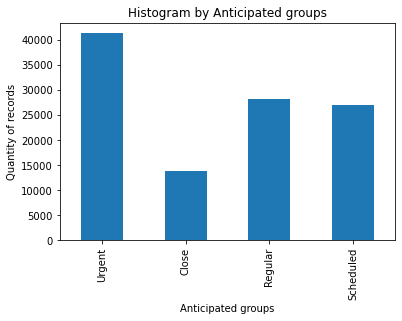

In [71]:
data.groupby('Anticipated_group').size().plot(kind='bar', title='Histogram by Anticipated groups',
                                    xlabel='Anticipated groups', ylabel='Quantity of records')

<b><FONT COLOR='RED'>IMPORTANT</FONT>: It is important to note that the dependent variable is 'No-show'. It could depend on all the other variables. For example: Gender, Scheduled Day, Appointment Day, Age, Neighborhood, Scholarship, Hypertension, Diabetes, Alcoholism, Handcap, SMS_received.</b>

In [72]:
Show = data['No-show'] == 'No'
NoShow = data['No-show'] == 'Yes'

In [73]:
data.groupby(['Gender'])['No-show'].value_counts()

Gender  No-show
F       No         57246
        Yes        14594
M       No         30962
        Yes         7725
Name: No-show, dtype: int64

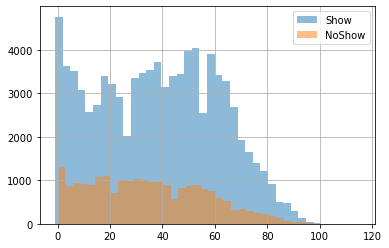

In [74]:
data.Age[Show].hist(alpha=0.5, bins=40, label='Show')
data.Age[NoShow].hist(alpha=0.5, bins=40, label='NoShow')
plt.legend();

This graph gives us an overview, but through exploratory data analysis we will be able to review our concerns in more detail.

<b>Before start EDA, we are cleaning the data frame with irrelevant columns.</b>

In [75]:
data.head()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Anticipated_days,Weekday_ScheduledDay,Weekday_AppointmentDay,Age_groups,Anticipated_group
0,F,62,0,1,0,0,0,0,No,0,Friday,Friday,> 56,Urgent
1,M,56,0,0,0,0,0,0,No,0,Friday,Friday,> 56,Urgent
2,F,62,0,0,0,0,0,0,No,0,Friday,Friday,> 56,Urgent
3,F,8,0,0,0,0,0,0,No,0,Friday,Friday,<18,Urgent
4,F,56,0,1,1,0,0,0,No,0,Friday,Friday,> 56,Urgent


In [76]:
data.head()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Anticipated_days,Weekday_ScheduledDay,Weekday_AppointmentDay,Age_groups,Anticipated_group
0,F,62,0,1,0,0,0,0,No,0,Friday,Friday,> 56,Urgent
1,M,56,0,0,0,0,0,0,No,0,Friday,Friday,> 56,Urgent
2,F,62,0,0,0,0,0,0,No,0,Friday,Friday,> 56,Urgent
3,F,8,0,0,0,0,0,0,No,0,Friday,Friday,<18,Urgent
4,F,56,0,1,1,0,0,0,No,0,Friday,Friday,> 56,Urgent


<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 (How much a person's gender influences their responsibility to show up for the scheduled appointment ?)

In [77]:
#Will be the Gender a relevant factor to no show.

data.groupby(['Gender'])['No-show'].value_counts()

Gender  No-show
F       No         57246
        Yes        14594
M       No         30962
        Yes         7725
Name: No-show, dtype: int64

In [78]:
data.Gender.value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

In [79]:
Gender_NoShow = pd.crosstab(index=data['Gender'], columns=data['No-show'])
Gender_NoShow

No-show,No,Yes
Gender,,
F,57246,14594
M,30962,7725


It is a better way to compare both variables with crosstab function

In [80]:
Gender_NoShow = round(pd.crosstab(index=data['Gender'], columns=data['No-show'], normalize='index')*100, 2)
Gender_NoShow

No-show,No,Yes
Gender,,
F,79.69,20.31
M,80.03,19.97


Now, other way to present the information using percentages

<AxesSubplot:title={'center':'Gender vs No-show'}, xlabel='Gender', ylabel='Percentage'>

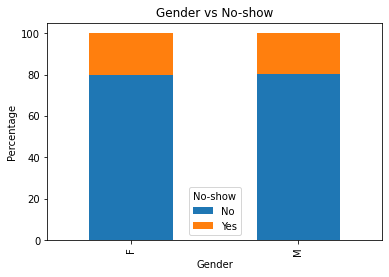

In [81]:
Gender_NoShow.plot(kind='bar', title='Gender vs No-show', stacked = True, 
                               xlabel='Gender', ylabel='Percentage')


<b>In my opinion, we don't have a significant difference between gender and No-show.</b>

### Research Question 2  (How much help to send an SMS message to remind the user that they have a planned visit to the hospital ?)

In [82]:

data.groupby(['SMS_received'])['No-show'].value_counts()


SMS_received  No-show
0             No         62510
              Yes        12535
1             No         25698
              Yes         9784
Name: No-show, dtype: int64

In [83]:
data.SMS_received.value_counts()

0    75045
1    35482
Name: SMS_received, dtype: int64

In [84]:
SMS_received_NoShow = pd.crosstab(index=data['SMS_received'], columns=data['No-show'])
SMS_received_NoShow

No-show,No,Yes
SMS_received,,
0,62510,12535
1,25698,9784


In [85]:
SMS_received_NoShow = round(pd.crosstab(index=data['SMS_received'], columns=data['No-show'], normalize='index')*100, 2)
SMS_received_NoShow

No-show,No,Yes
SMS_received,,
0,83.30,16.70
1,72.43,27.57


<AxesSubplot:title={'center':'SMS_received vs No-show'}, xlabel='SMS_received', ylabel='Percentage'>

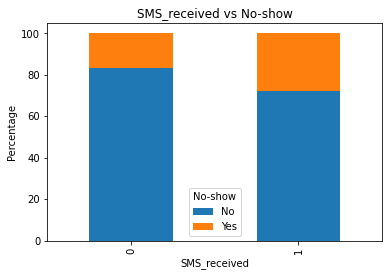

In [86]:
SMS_received_NoShow.plot(kind='bar', title='SMS_received vs No-show', stacked = True, 
                               xlabel='SMS_received', ylabel='Percentage')

<b>In this case is strange to see that a SMS-received don't help to improve the Show up in an Appointment. At the beginning of the analysis I would have opted for a different result.</b>

### Research Question 3  ( There is a relationship between the Scholarship and the responsibility to show up at the planned appointment ? )

In [87]:
data.groupby(['Scholarship'])['No-show'].value_counts()


Scholarship  No-show
0            No         79925
             Yes        19741
1            No          8283
             Yes         2578
Name: No-show, dtype: int64

In [88]:
data.Scholarship.value_counts()


0    99666
1    10861
Name: Scholarship, dtype: int64

In [89]:
Scholarship_NoShow = pd.crosstab(index=data['Scholarship'], columns=data['No-show'])
Scholarship_NoShow


No-show,No,Yes
Scholarship,,
0,79925,19741
1,8283,2578


In [90]:
Scholarship_NoShow = round(pd.crosstab(index=data['Scholarship'], columns=data['No-show'], normalize='index')*100, 2)
Scholarship_NoShow


No-show,No,Yes
Scholarship,,
0,80.19,19.81
1,76.26,23.74


<AxesSubplot:title={'center':'Scholarship vs No-show'}, xlabel='Scholarship', ylabel='Percentage'>

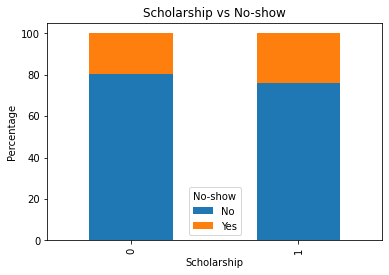

In [91]:
Scholarship_NoShow.plot(kind='bar', title='Scholarship vs No-show', stacked = True, 
                               xlabel='Scholarship', ylabel='Percentage')


<b>In this case is strange to see that a Scholarship don't help to improve the Show up in an Appointment. At the beginning of the analysis I would have opted for a different result.</b>

### Research Question 4  ( How much age influences the responsibility to attend a planned appointment ? )


In [92]:
data.groupby(['Age'])['No-show'].value_counts()


Age   No-show
-1    No            1
 0    No         2900
      Yes         639
 1    No         1858
      Yes         415
                 ... 
 99   No            1
 100  No            4
 102  No            2
 115  Yes           3
      No            2
Name: No-show, Length: 204, dtype: int64

In [93]:
data.Age.value_counts()


 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

In [94]:
Age_NoShow = pd.crosstab(index=data['Age'], columns=data['No-show'])
Age_NoShow


No-show,No,Yes
Age,,
-1,1,0
0,2900,639
1,1858,415
2,1366,252
3,1236,277
...,...,...
98,5,1
99,1,0
100,4,0


In [95]:
Age_NoShow = round(pd.crosstab(index=data['Age'], columns=data['No-show'], normalize='index')*100, 2)
Age_NoShow


No-show,No,Yes
Age,,
-1,100.00,0.00
0,81.94,18.06
1,81.74,18.26
2,84.43,15.57
3,81.69,18.31
...,...,...
98,83.33,16.67
99,100.00,0.00
100,100.00,0.00


<AxesSubplot:title={'center':'Age vs No-show'}, xlabel='Age', ylabel='Percentage'>

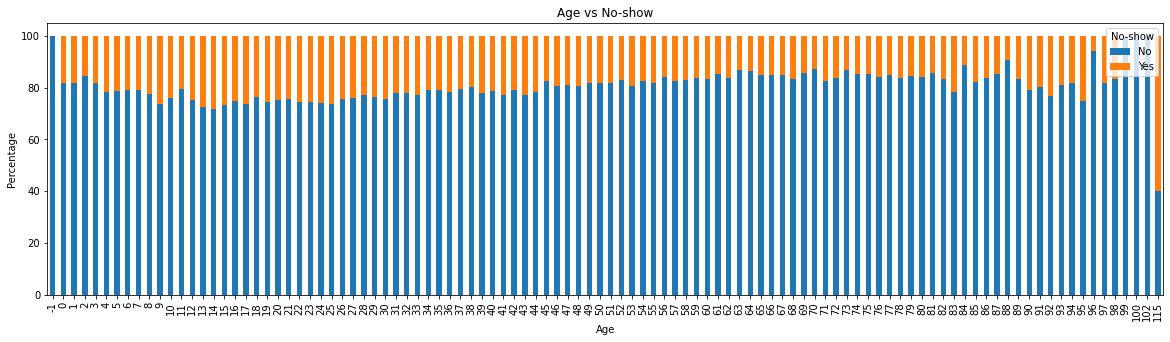

In [96]:

Age_NoShow.plot(kind='bar', title='Age vs No-show', stacked = True, figsize=(20,5), 
                            xlabel='Age', ylabel='Percentage')



<b>It's not easy to see between what range of age is better to improve the indicator of show up an a Appointment. Using different groups could be a better option.</b>

In [97]:
Age_groups_NoShow = pd.crosstab(index=data['Age_groups'], columns=data['No-show'])
Age_groups_NoShow


No-show,No,Yes
Age_groups,,
<18,22519,6347
19 - 37,20836,6414
38 - 55,21651,5255
> 56,23201,4303


In [98]:
Age_groups_NoShow = round(pd.crosstab(index=data['Age_groups'], columns=data['No-show'], normalize='index')*100, 2)
Age_groups_NoShow


No-show,No,Yes
Age_groups,,
<18,78.01,21.99
19 - 37,76.46,23.54
38 - 55,80.47,19.53
> 56,84.36,15.64


<AxesSubplot:title={'center':'Age_groups vs No-show'}, xlabel='Age groups', ylabel='Percentage'>

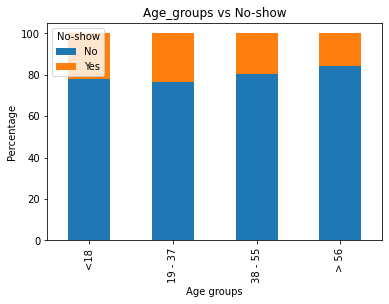

In [99]:
Age_groups_NoShow.plot(kind='bar', title='Age_groups vs No-show', stacked = True, 
                       xlabel='Age groups', ylabel='Percentage')


<b>In this case is easy to see that in the range > 56 increase the show up an a Appointment.</b>

### Research Question 5 ( There is a relationship between the Hipertension and the responsibility to show up at the planned appointment ? )


In [100]:
data.groupby(['Hipertension'])['No-show'].value_counts()

Hipertension  No-show
0             No         70179
              Yes        18547
1             No         18029
              Yes         3772
Name: No-show, dtype: int64

In [101]:
data.Hipertension.value_counts()

0    88726
1    21801
Name: Hipertension, dtype: int64

In [102]:
Hipertension_NoShow = pd.crosstab(index=data['Hipertension'], columns=data['No-show'])
Hipertension_NoShow

No-show,No,Yes
Hipertension,,
0,70179,18547
1,18029,3772


In [103]:
Hipertension_NoShow = round(pd.crosstab(index=data['Hipertension'], columns=data['No-show'], normalize='index')*100, 2)
Hipertension_NoShow

No-show,No,Yes
Hipertension,,
0,79.1,20.9
1,82.7,17.3


<AxesSubplot:title={'center':'Hipertension vs No-show'}, xlabel='Hipertension', ylabel='Percentage'>

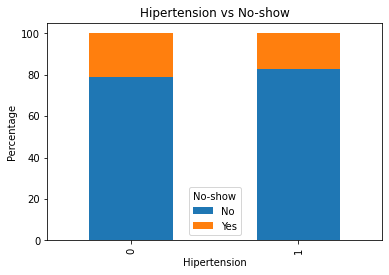

In [104]:
Hipertension_NoShow.plot(kind='bar', title='Hipertension vs No-show', stacked = True, 
                         xlabel='Hipertension', ylabel='Percentage')

<b>In this case the people with Hipertension have a better indicator for show up an a Appointment.</b>

### Research Question 6 ( There is a relationship between the Diabetes and the responsibility to show up at the planned appointment ? )

In [105]:

data.groupby(['Diabetes'])['No-show'].value_counts()


Diabetes  No-show
0         No         81695
          Yes        20889
1         No          6513
          Yes         1430
Name: No-show, dtype: int64

In [106]:
data.Diabetes.value_counts()

0    102584
1      7943
Name: Diabetes, dtype: int64

In [107]:
Diabetes_NoShow = pd.crosstab(index=data['Diabetes'], columns=data['No-show'])
Diabetes_NoShow

No-show,No,Yes
Diabetes,,
0,81695,20889
1,6513,1430


In [108]:
Diabetes_NoShow = round(pd.crosstab(index=data['Diabetes'], columns=data['No-show'], normalize='index')*100, 2)
Diabetes_NoShow


No-show,No,Yes
Diabetes,,
0,79.64,20.36
1,82.00,18.00


<AxesSubplot:title={'center':'Diabetes vs No-show'}, xlabel='Diabetes', ylabel='Percentage'>

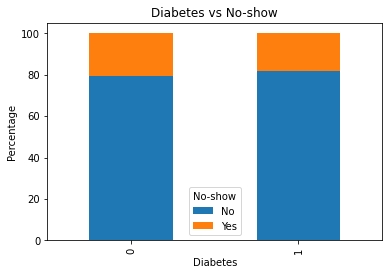

In [109]:
Diabetes_NoShow.plot(kind='bar', title='Diabetes vs No-show', stacked = True, 
                         xlabel='Diabetes', ylabel='Percentage')


<b>In this case the people with Diabetes have a better indicator for show up an a Appointment.</b>

### Research Question 7 ( There is a relationship between the Alcoholism and the responsibility to show up at the planned appointment ? ) 

In [110]:
data.groupby(['Alcoholism'])['No-show'].value_counts()

Alcoholism  No-show
0           No         85525
            Yes        21642
1           No          2683
            Yes          677
Name: No-show, dtype: int64

In [111]:
data.Alcoholism.value_counts()

0    107167
1      3360
Name: Alcoholism, dtype: int64

In [112]:
Alcoholism_NoShow = pd.crosstab(index=data['Alcoholism'], columns=data['No-show'])
Alcoholism_NoShow

No-show,No,Yes
Alcoholism,,
0,85525,21642
1,2683,677


In [113]:
Alcoholism_NoShow = round(pd.crosstab(index=data['Alcoholism'], columns=data['No-show'], normalize='index')*100, 2)
Alcoholism_NoShow

No-show,No,Yes
Alcoholism,,
0,79.81,20.19
1,79.85,20.15


<AxesSubplot:title={'center':'Alcoholism vs No-show'}, xlabel='Alcoholism', ylabel='Percentage'>

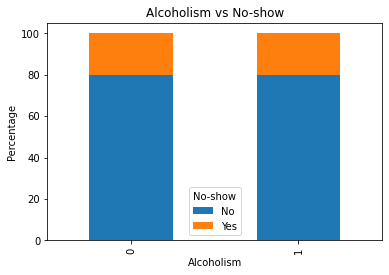

In [114]:
Alcoholism_NoShow.plot(kind='bar', title='Alcoholism vs No-show', stacked = True, 
                         xlabel='Alcoholism', ylabel='Percentage')

<b>In my opinion, we don't have a significant difference between Alcoholism and No-show. This variable not affect show up an a Appointment.</b>

### Research Question 8 ( There is a relationship between the Handcap and the responsibility to show up at the planned appointment ? )
 )

In [115]:
data.groupby(['Handcap'])['No-show'].value_counts()

Handcap  No-show
0        No         86374
         Yes        21912
1        No          1676
         Yes          366
2        No           146
         Yes           37
3        No            10
         Yes            3
4        No             2
         Yes            1
Name: No-show, dtype: int64

In [116]:
data.Handcap.value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [117]:
Handcap_NoShow = pd.crosstab(index=data['Handcap'], columns=data['No-show'])
Handcap_NoShow

No-show,No,Yes
Handcap,,
0,86374,21912
1,1676,366
2,146,37
3,10,3
4,2,1


In [118]:
Handcap_NoShow = round(pd.crosstab(index=data['Handcap'], columns=data['No-show'], normalize='index')*100, 2)
Handcap_NoShow

No-show,No,Yes
Handcap,,
0,79.76,20.24
1,82.08,17.92
2,79.78,20.22
3,76.92,23.08
4,66.67,33.33


<AxesSubplot:title={'center':'Handcap vs No-show'}, xlabel='Handcap', ylabel='Percentage'>

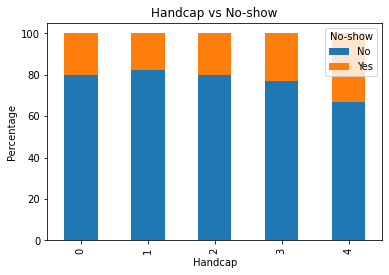

In [119]:
Handcap_NoShow.plot(kind='bar', title='Handcap vs No-show', stacked = True, 
                    xlabel='Handcap', ylabel='Percentage')

<b>In this case the people with more Handcap decrease the indicator for show up an a Appointment.</b>

### Research Question 9 ( There is a relationship between the Antipated days and the responsibility to show up at the planned appointment ? )
 

In [120]:
data.groupby(['Anticipated_days'])['No-show'].value_counts()

Anticipated_days  No-show
-6                Yes            1
-1                Yes            2
 0                No         11562
                  Yes          596
 1                No         27418
                             ...  
 176              Yes            4
 177              No             6
                  Yes            2
 180              No             8
                  Yes            2
Name: No-show, Length: 243, dtype: int64

In [121]:
data.Anticipated_days.value_counts()

1      29210
0      12158
3       5774
7       4910
2       4891
       ...  
108        1
102        1
101        1
152        1
127        1
Name: Anticipated_days, Length: 136, dtype: int64

In [122]:
Anticipated_days_NoShow = pd.crosstab(index=data['Anticipated_days'], columns=data['No-show'])
Anticipated_days_NoShow

No-show,No,Yes
Anticipated_days,,
-6,0,1
-1,0,2
0,11562,596
1,27418,1792
2,3774,1117
...,...,...
162,9,2
169,7,1
176,4,4


In [123]:
Anticipated_days_NoShow = round(pd.crosstab(index=data['Anticipated_days'], columns=data['No-show'], normalize='index')*100, 2)
Anticipated_days_NoShow

No-show,No,Yes
Anticipated_days,,
-6,0.00,100.00
-1,0.00,100.00
0,95.10,4.90
1,93.87,6.13
2,77.16,22.84
...,...,...
162,81.82,18.18
169,87.50,12.50
176,50.00,50.00


<AxesSubplot:title={'center':'Anticipated_days vs No-show'}, xlabel='Anticipated days', ylabel='Percentage'>

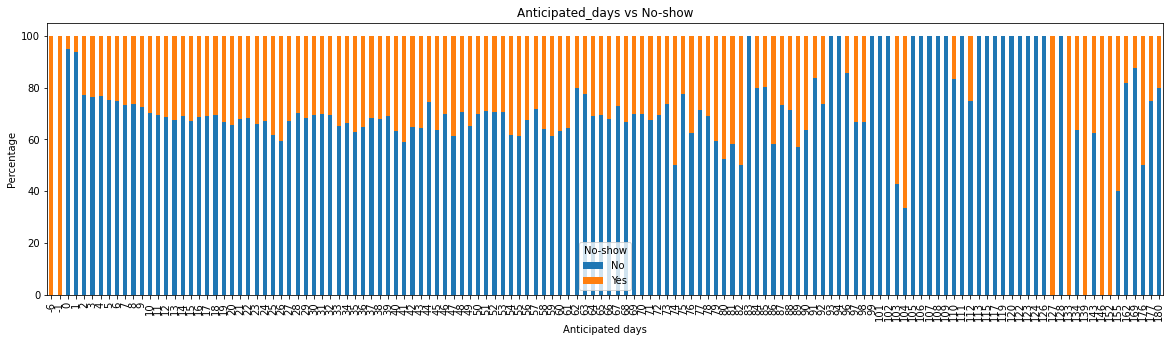

In [124]:
Anticipated_days_NoShow.plot(kind='bar', title='Anticipated_days vs No-show', stacked = True, 
                             figsize=(20,5), xlabel='Anticipated days', ylabel='Percentage')

<b>It's not easy to see if Anticipated days is better to improve the indicator of show up an a Appointment. Using different groups could be a better option.</b>

In [125]:

data.groupby(['Anticipated_group'])['No-show'].value_counts()


Anticipated_group  No-show
Urgent             No         38980
                   Yes         2390
Close              No         10711
                   Yes         3255
Regular            No         20303
                   Yes         7857
Scheduled          No         18214
                   Yes         8816
Name: No-show, dtype: int64

In [126]:
data.Anticipated_group.value_counts()


Urgent       41370
Regular      28160
Scheduled    27030
Close        13966
Name: Anticipated_group, dtype: int64

In [127]:
Anticipated_group_NoShow = pd.crosstab(index=data['Anticipated_group'], columns=data['No-show'])
Anticipated_group_NoShow

No-show,No,Yes
Anticipated_group,,
Urgent,38980,2390
Close,10711,3255
Regular,20303,7857
Scheduled,18214,8816


In [128]:
Anticipated_group_NoShow = round(pd.crosstab(index=data['Anticipated_group'], columns=data['No-show'], normalize='index')*100, 2)
Anticipated_group_NoShow


No-show,No,Yes
Anticipated_group,,
Urgent,94.22,5.78
Close,76.69,23.31
Regular,72.10,27.90
Scheduled,67.38,32.62


<AxesSubplot:title={'center':'Anticipated_group vs No-show'}, xlabel='Anticipated groups', ylabel='Percentage'>

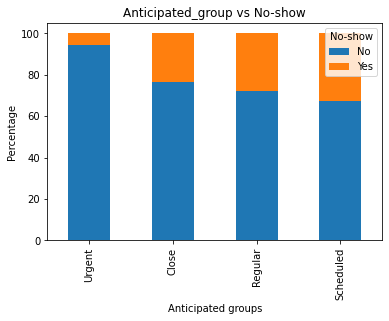

In [129]:
Anticipated_group_NoShow.plot(kind='bar', title='Anticipated_group vs No-show', stacked = True, 
                              xlabel='Anticipated groups', ylabel='Percentage')

<b>In this case, it is easy to observe that as the appointment is closer to the current date, a better performance indicator is obtained in the presentation of an appointment.</b>

### Research Question 10 ( There is a relationship between the Weekday Appointment Day  and the responsibility to show up at the planned appointment ? )

In [130]:

data.groupby(['Weekday_AppointmentDay'])['No-show'].value_counts()

Weekday_AppointmentDay  No-show
Friday                  No         14982
                        Yes         4037
Monday                  No         18025
                        Yes         4690
Saturday                No            30
                        Yes            9
Thursday                No         13909
                        Yes         3338
Tuesday                 No         20488
                        Yes         5152
Wednesday               No         20774
                        Yes         5093
Name: No-show, dtype: int64

In [131]:
data.Weekday_AppointmentDay.value_counts()

Wednesday    25867
Tuesday      25640
Monday       22715
Friday       19019
Thursday     17247
Saturday        39
Name: Weekday_AppointmentDay, dtype: int64

In [132]:
Weekday_AppointmentDay_NoShow = pd.crosstab(index=data['Weekday_AppointmentDay'], columns=data['No-show'])
Weekday_AppointmentDay_NoShow

No-show,No,Yes
Weekday_AppointmentDay,,
Friday,14982,4037
Monday,18025,4690
Saturday,30,9
Thursday,13909,3338
Tuesday,20488,5152
Wednesday,20774,5093


In [133]:

Weekday_AppointmentDay_NoShow = round(pd.crosstab(index=data['Weekday_AppointmentDay'], columns=data['No-show'], 
                                normalize='index')*100, 2)
Weekday_AppointmentDay_NoShow

No-show,No,Yes
Weekday_AppointmentDay,,
Friday,78.77,21.23
Monday,79.35,20.65
Saturday,76.92,23.08
Thursday,80.65,19.35
Tuesday,79.91,20.09
Wednesday,80.31,19.69


<AxesSubplot:title={'center':'Weekday_AppointmentDay vs No-show'}, xlabel='Weekday Appointment Day', ylabel='Percentage'>

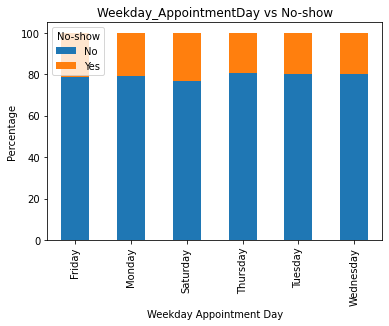

In [134]:
Weekday_AppointmentDay_NoShow.plot(kind='bar', title='Weekday_AppointmentDay vs No-show',
                                   stacked = True, xlabel='Weekday Appointment Day', ylabel='Percentage')

<b>According to the previous graph, Saturday is the day that has the worst indicator of compliance with a scheduled appointment. Looks good.</b>

<a id='conclusions'></a>
## Limitations

(1) In my opinion always is better have the maximum amount of data that allows the best possible analysis of the data. Unfortunately in this case we observe that there is not all the data available according to the capture IDs of the system and perhaps this inconvenience could produce adverse effects in the present prediction model.

Certain independent variables, such as Scholarship and SMS-received appear to be erratic and may lead us to misunderstand the data from this analysis.

Taking as a reference the "In [14] [15]", In terms of database records of capture the system, between the min and max Appointmend ID, we got 760254 records. It's a important things because our dataframe only have 110527 records.

We only got a 14.54% of total amount of record of appointments. Probably they had a issue with the capture of data.

(2) The time window available with the dataset covers about 7 months. It would be ideal to have much more information, hopefully at least twelve months to have a better understanding of the model considering the seasonal effects.

(3) Although the dataset contains many relevant variables, perhaps new variables could be incorporated that allow a better understanding of how to make the delivery of medical hours more efficient. For example, the absenteeism history of the same patients in previous opportunities.



## Conclusions



It is surprising that many times the initial hypotheses that one can make, based on perception, can lead us to make bad decisions. The importance of this project, and in the analysis based on the evidence of the data, can help to better interpret the environment variables associated with a particular problem. 
<br>

<li>In my opinion, we don't have a significant difference between gender and No-show.</li>
<li>It's strange to see that a SMS-received don't help to improve the Show up in an Appointment. At the beginning of the analysis I would have opted for a different result.</li>
<li>It's strange to see that a Scholarship don't help to improve the Show up in an Appointment. At the beginning of the analysis I would have opted for a different result.</li>
<li>We don't have a significant difference between Alcoholism and No-show. This variable not affect show up an a Appointment.</li>
<li>According to the previous graph, Saturday is the day that has the worst indicator of compliance with a scheduled appointment. Looks good.</li>



In a positive way, we can affirm that the following variables positively affect the presentation to a previously scheduled medical appointment.
<ul>
    <li>The Age range > 56 years old, increase the show up an a Appointment.</li>
    <li>The people with Hipertension, Diabetes and less Handcap have a better indicator.</li>
    <li>If the appointment is closer to the current date, we get a better performance indicator.</li>
</ul>

Finally, the conjunction of all the previous variables will significantly improve attendance at medical hours, making the entire process more efficient and producing economic and social benefits for the community near the medical center.


